# ***FRACTAL ANALYSIS***

# Links of the code which helped me with this assignment.

I have used the library of neurokit. It has large number of packages for biomedical signal processing. 

link for neurokit codes - GitHub - https://github.com/neuropsychology/NeuroKit.py

The documentation of neurokit has more detailed functions - https://neurokit.readthedocs.io/en/latest/index.html

For Higuchi fractal dimension the function description given here works well : https://neurokit.readthedocs.io/en/latest/_modules/neurokit/signal/complexity.html

Here, it is to be noted, that neurokit2 can also be used. Neurokit2 has more inbuilt functions than the first version of neurokit. But for now I have used the initial version of neurokit due to its simplicity in understanding.

For DFA and hurst exponent through nolds library, I referred this documentation -> 

Hurst exponent -> https://nolds.readthedocs.io/en/latest/nolds.html#hurst-exponent  
DFA -> https://nolds.readthedocs.io/en/latest/nolds.html#detrended-fluctuation-analysis


For boxplot analysis , I found the code here : https://github.com/ErikRZH/Fractal-Dimension/blob/master/fractal-dimension.py

Other than these, there were many other libraries, modules and code available. For further analysis, many other tests can be done. 

# **LET'S START WITH THE ANALYSIS**

In [ ]:
!pip install https://github.com/neuropsychology/NeuroKit.py/zipball/master

     / 75.7MB 197kB/s
     |████████████████████████████████| 6.9MB 4.0MB/s 
     |████████████████████████████████| 81kB 8.6MB/s 
  Created wheel for neurokit: filename=neurokit-0.2.8-cp36-none-any.whl size=721770 sha256=ab94b9b8569f2c56d14852436e39e803992bf523d3207e83f644cca005eee7bb
  Stored in directory: /tmp/pip-ephem-wheel-cache-8h0kbbup/wheels/67/e1/05/20638d7a9bdf264e2b0a9330e7fc04757218fa4934a02fac38
  Created wheel for bioread: filename=bioread-2.1.2-cp36-none-any.whl size=37525 sha256=3c20d2a0149138f8817864bb3ad50017145f7ffc172859a7a3d78b8f4e6e53d1
  Stored in directory: /root/.cache/pip/wheels/29/52/13/61dd93db3415e7f4f9ef0755a6b6ebe71231567f0df3319857
Successfully built neurokit bioread


In [ ]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import neurokit as nk 
import nolds
import numpy as np
import imageio
 
print(os.getcwd())

/content


In [ ]:
data= pd.read_csv('intern_dataset.csv')
data

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A
...,...,...,...,...
911995,2020-01-04 10:55:49.186,34673.811155,0.151395,C
911996,2020-01-04 10:55:49.196,34672.951723,0.151385,C
911997,2020-01-04 10:55:49.206,34671.967555,0.151373,C
911998,2020-01-04 10:55:49.216,34670.877944,0.151359,C


In [ ]:
print(type(data))
data.describe() 

<class 'pandas.core.frame.DataFrame'>


,Signal1,Signal2
count,912000.000000,912000.000000
mean,31315.380483,0.398004
std,11700.734813,0.258119
min,-2934.328327,0.113841
25%,23851.958837,0.162522
50%,30650.812455,0.261210
75%,37933.966586,0.546605
max,67692.652022,1.356019


In [ ]:
data['Label'].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
data.isna().sum()  #check for null values

Time       0
Signal1    0
Signal2    0
Label      0
dtype: int64

In [ ]:
#divide the data with respect to A, B and C lables 
data_A = data[data['Label'] == 'A']
print(len(data_A)) #length of A
data_B = data[data['Label'] == 'B']
print(len(data_B)) #length of B
data_C = data[data['Label'] == 'C']
print(len(data_C)) #length of C

318000
312000
282000


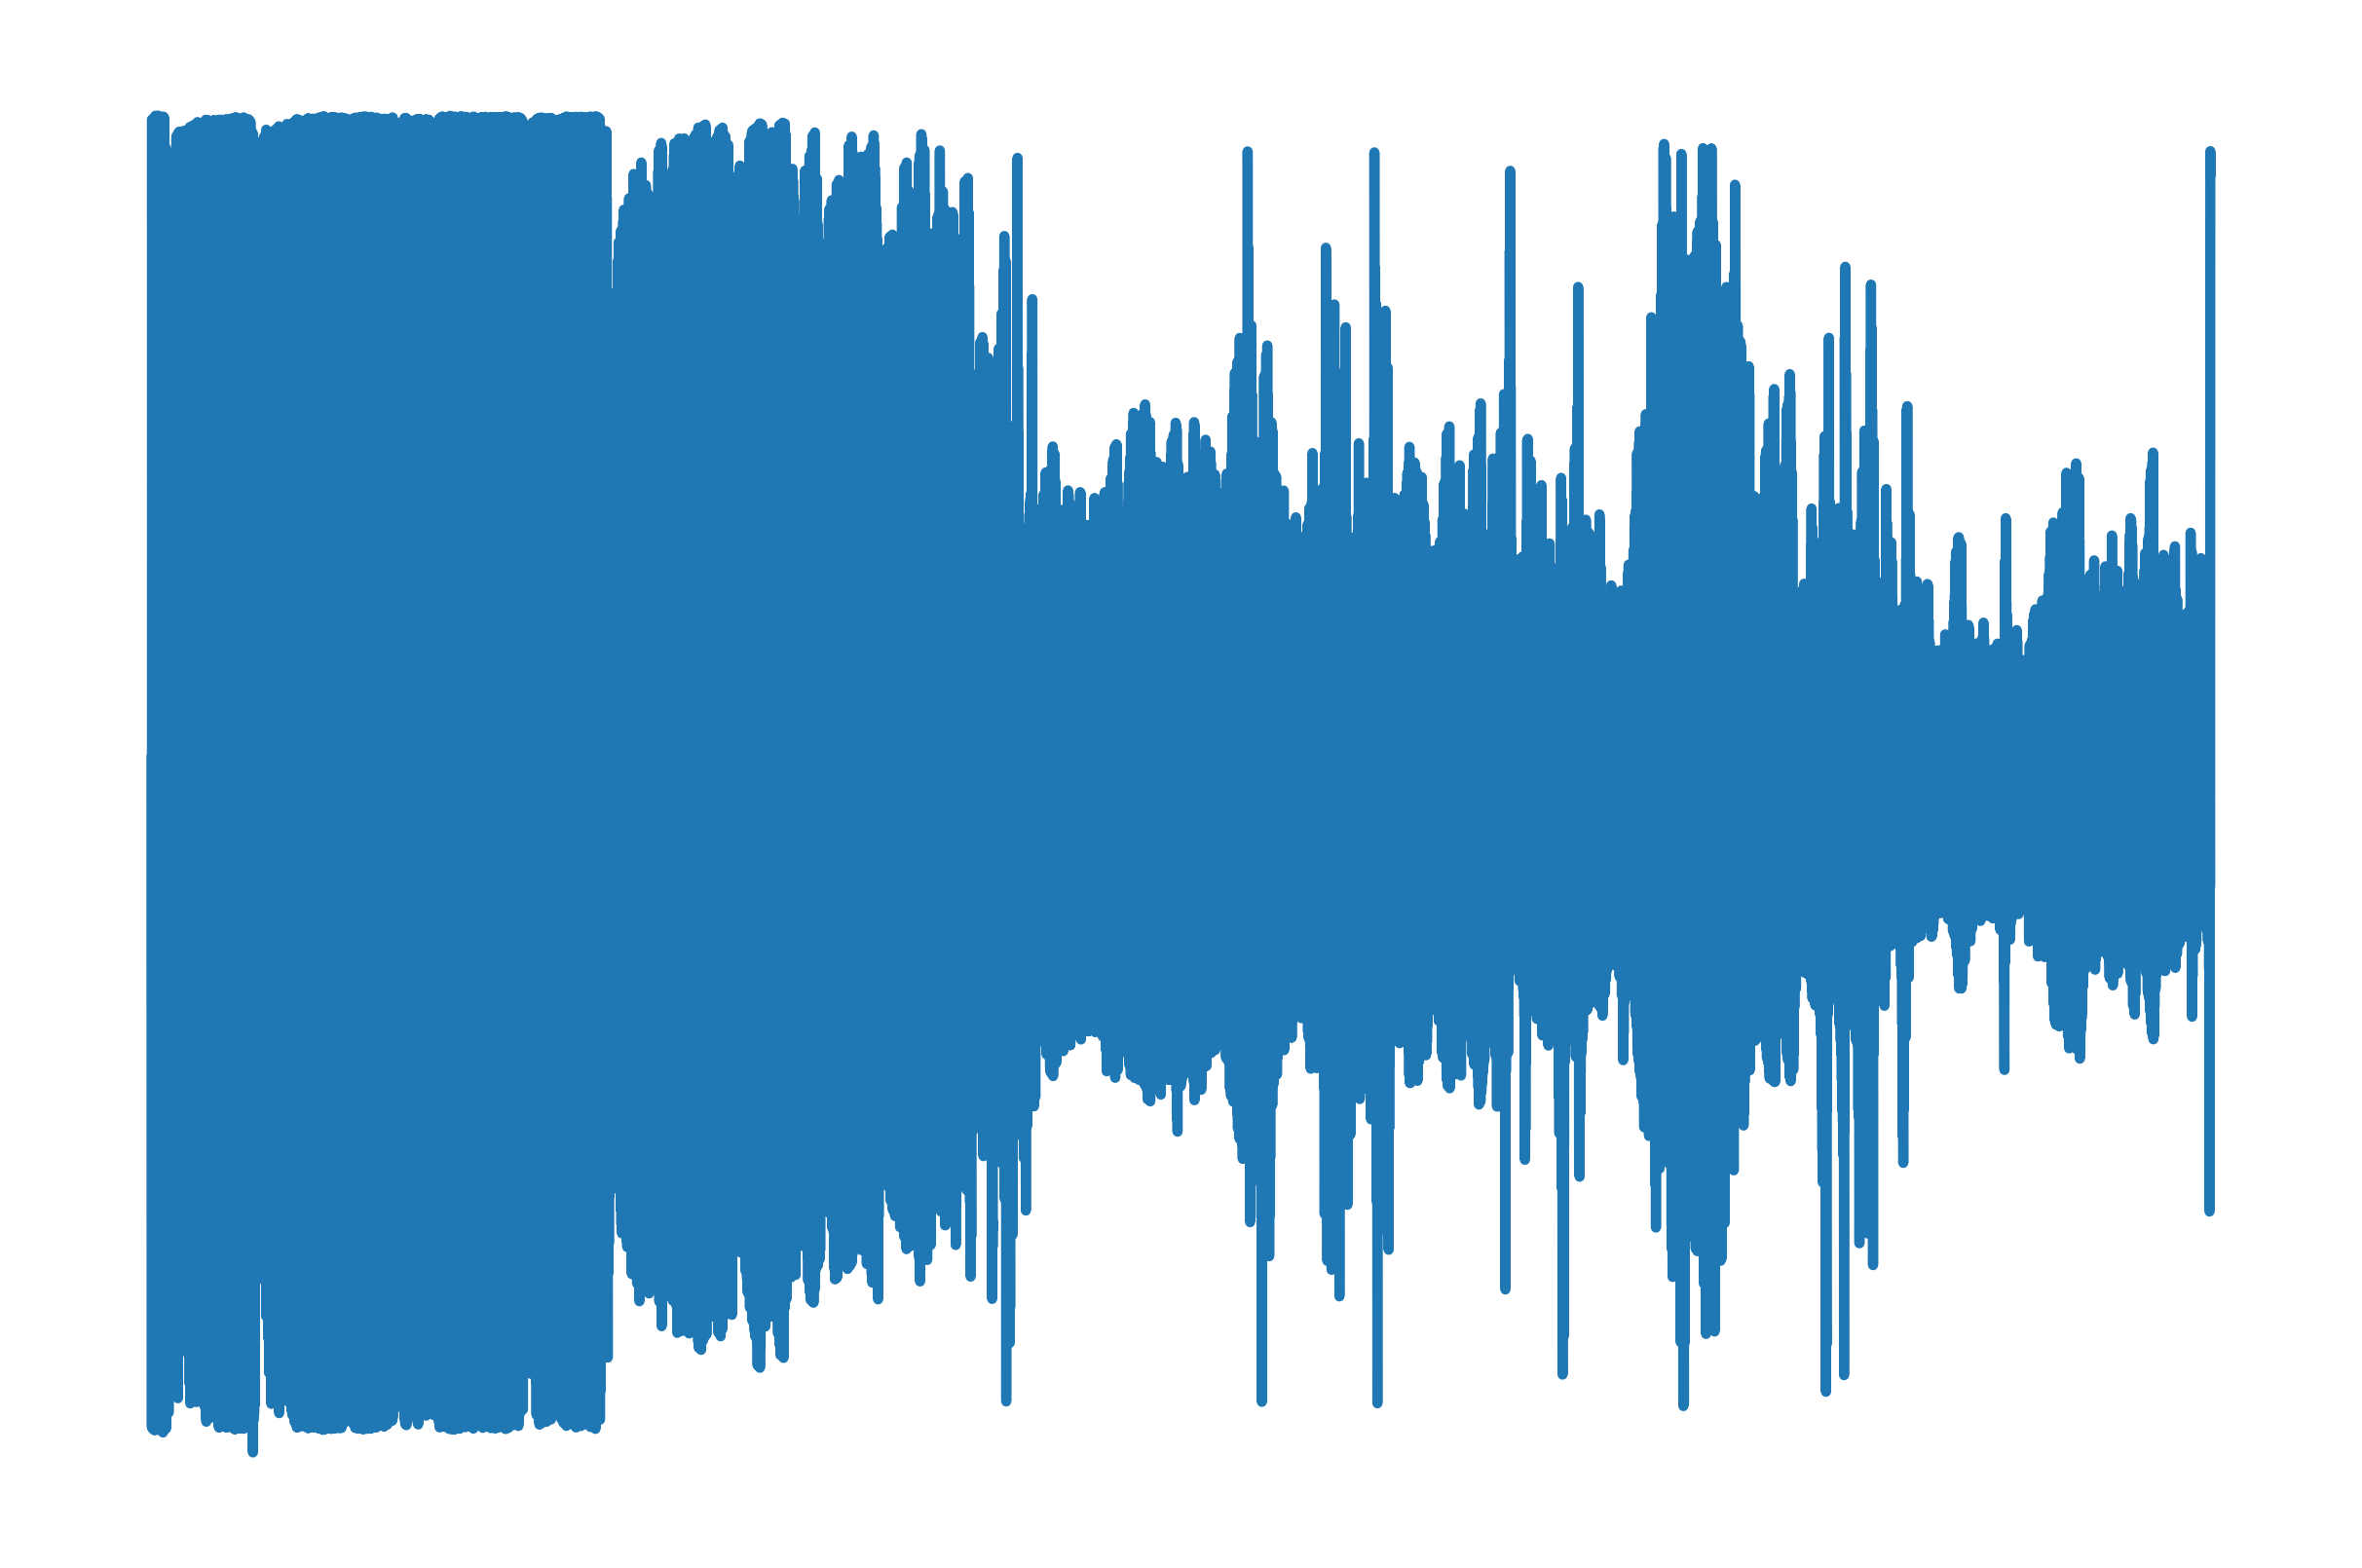

In [ ]:
#plotting of Signal1 for A

plt.figure(dpi=500)
plt.grid(b=False)
plt.axis(False)
plt.plot(data_A['Signal1'])

In [ ]:
#plotting of Signal2 for A
plt.figure(dpi=2000)
plt.grid(b=False)
plt.axis(False)
plt.plot(data_A['Signal2'])

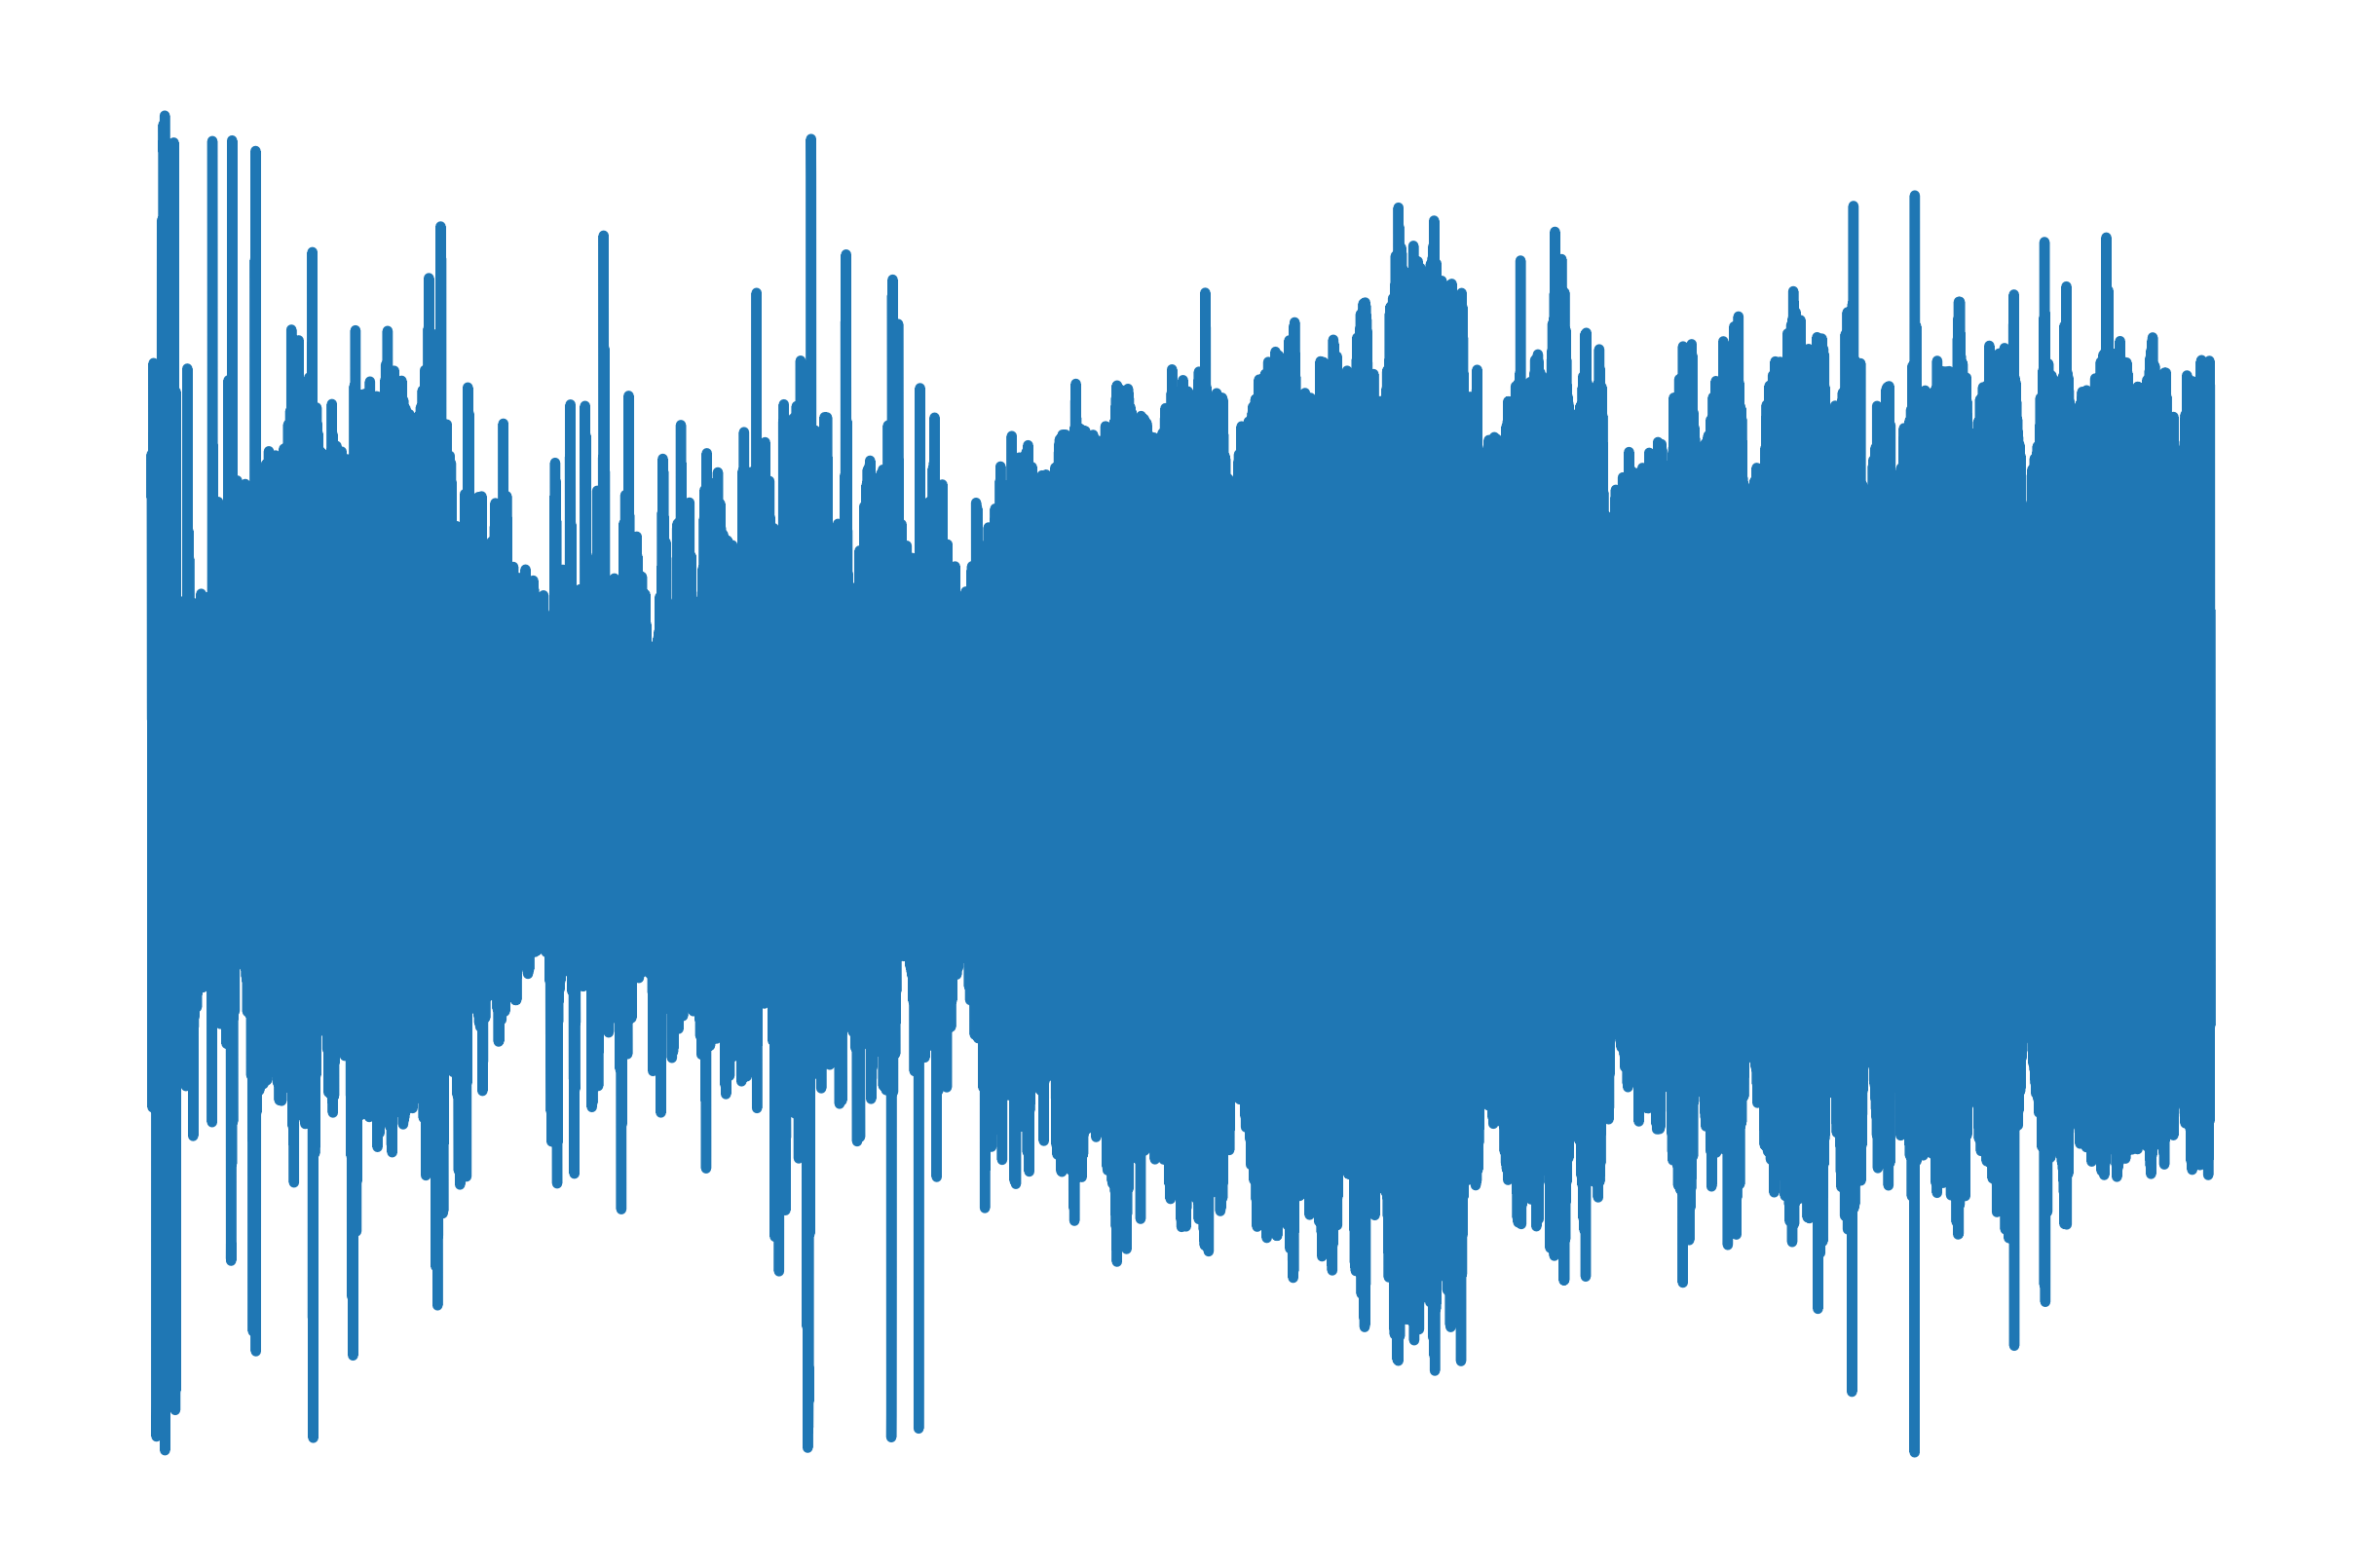

In [ ]:
#plotting of Signal1 for B

plt.figure(dpi=500)
plt.grid(b=False)
plt.axis(False)

plt.plot(data_B['Signal1'])

In [ ]:
#plotting of Signal2 for B
plt.figure(dpi=2000)
plt.grid(b=False)
plt.axis(False)
plt.plot(data_B['Signal2'])

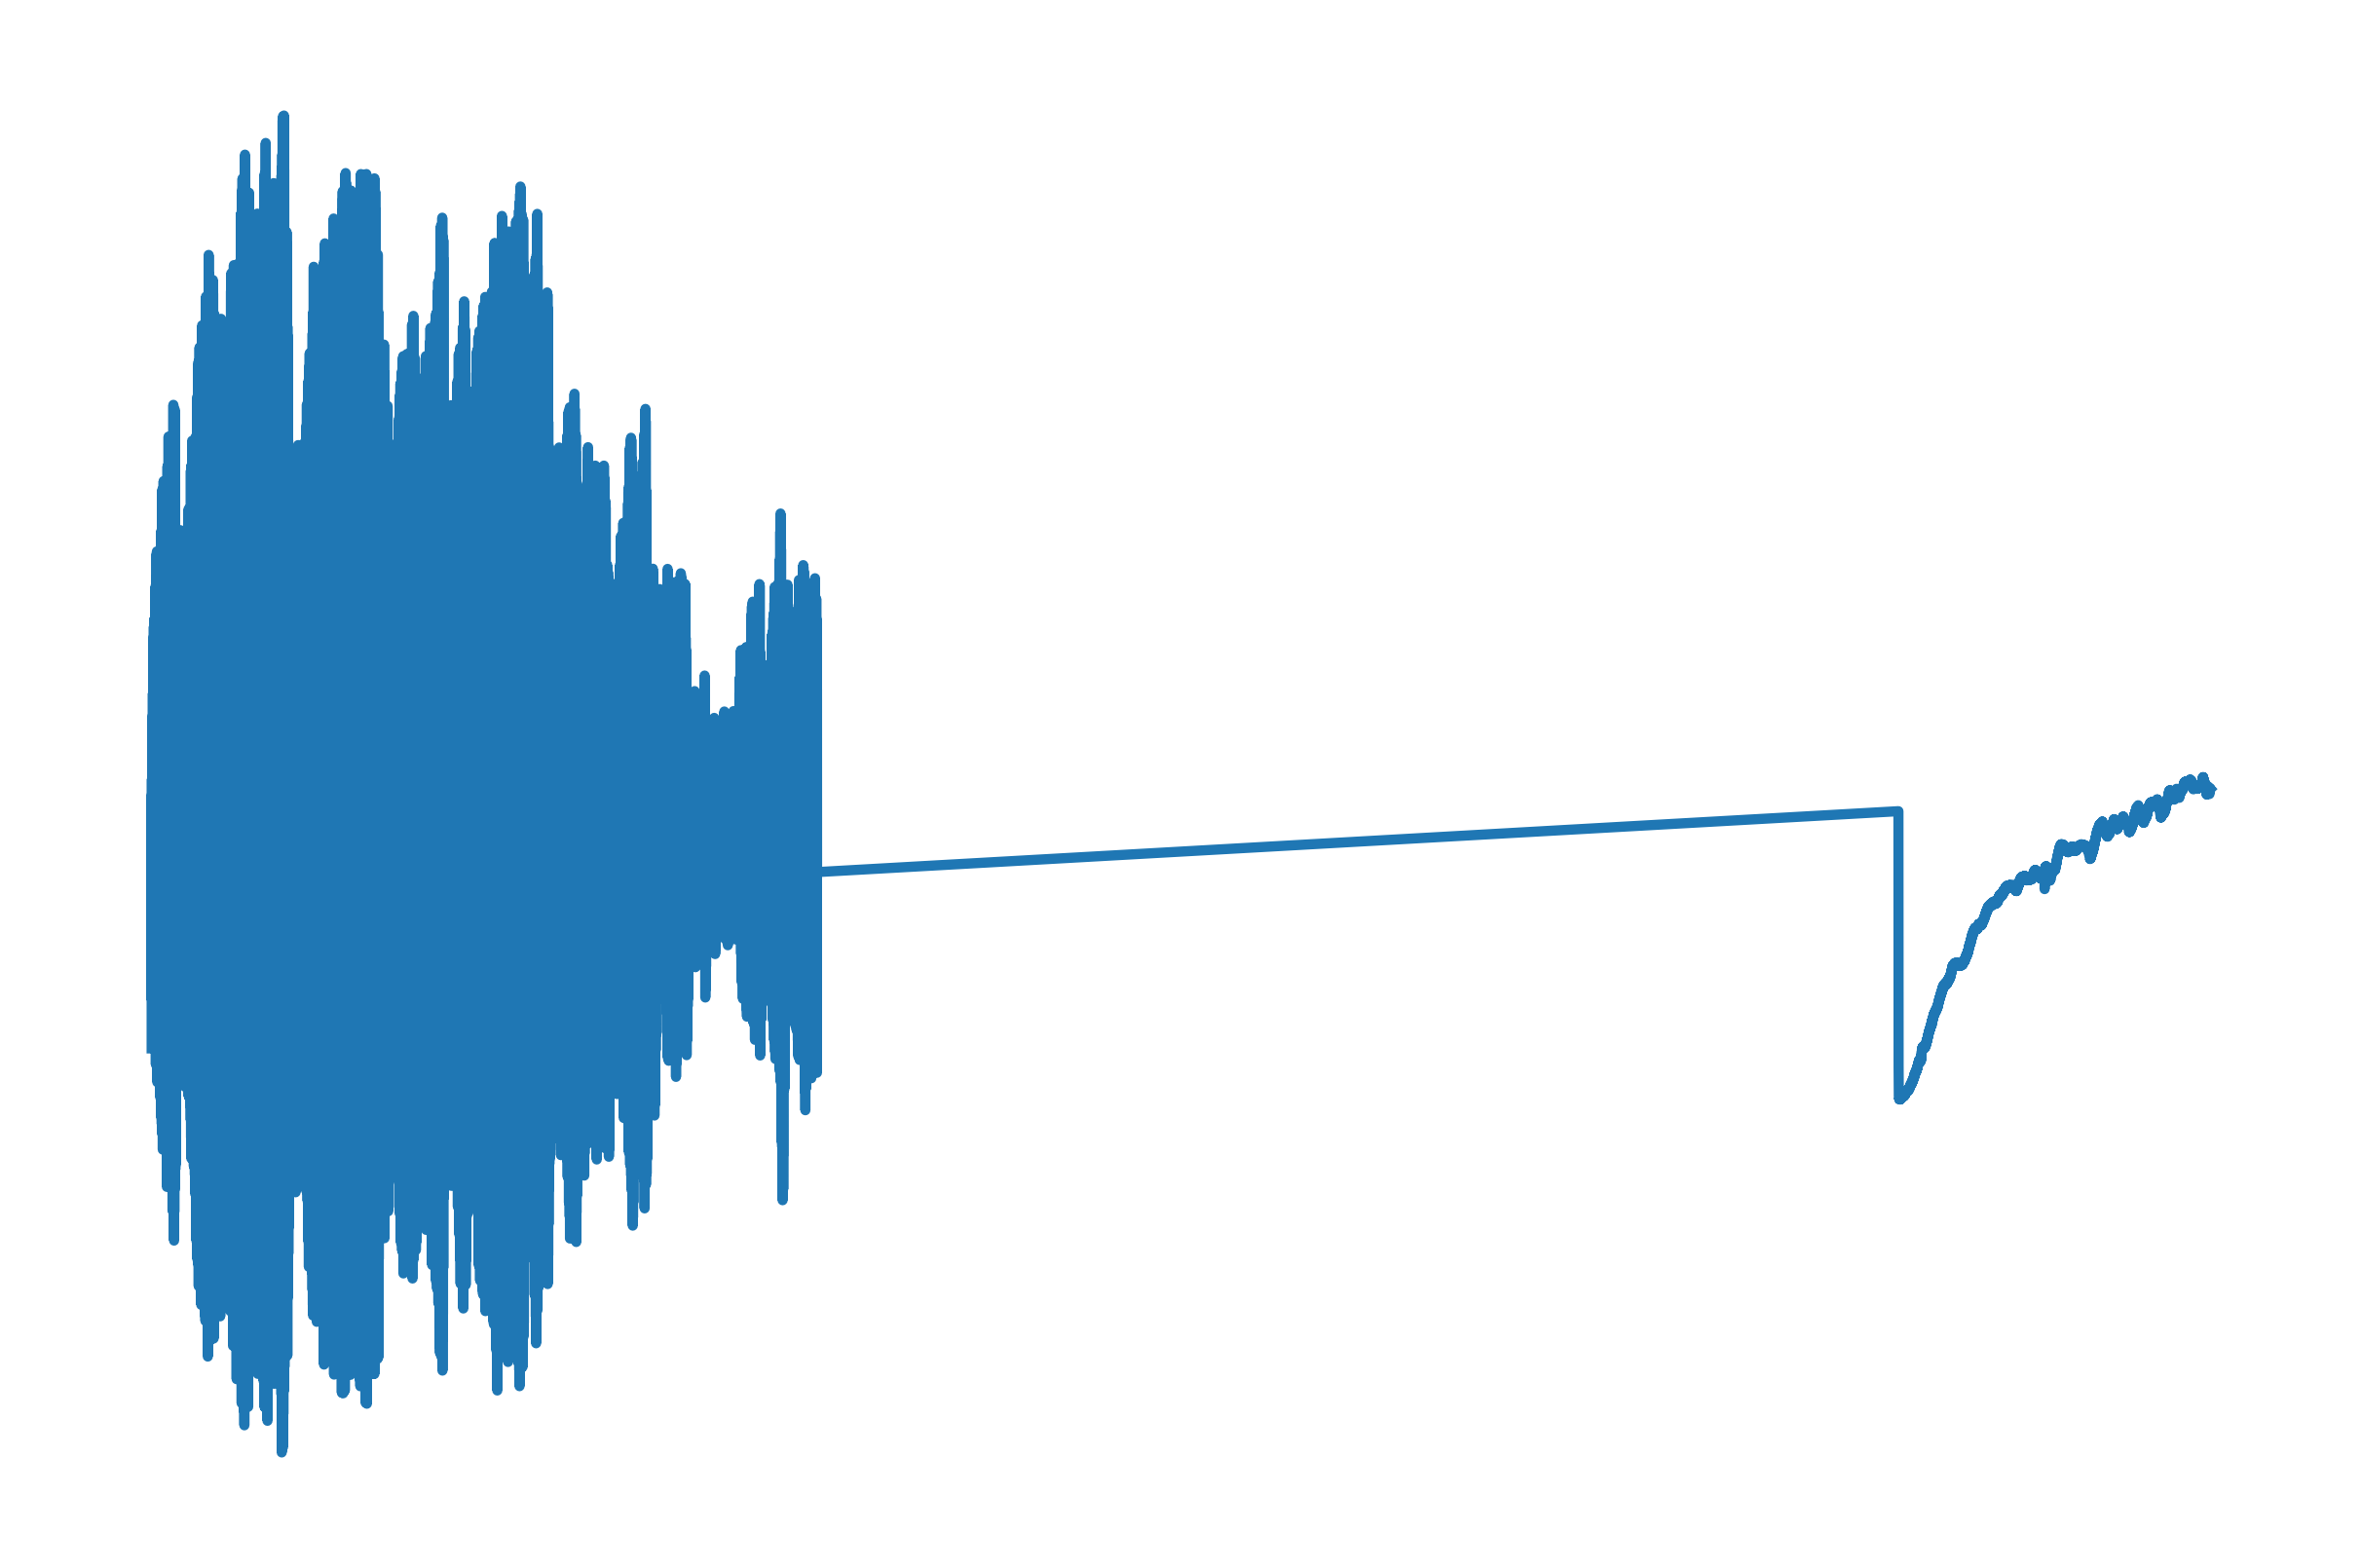

In [ ]:
#plotting of Signal1 for C

plt.figure(dpi=500)
plt.grid(b=False)
plt.axis(False)

plt.plot(data_C['Signal1'])

In [ ]:
#plotting of Signal2 for C
plt.figure(dpi=2000)
plt.grid(b=False)
plt.axis(False)
plt.plot(data_C['Signal2'])

Shape of the plot for Signal1 of label A and label B shows that, B looks like a persistent time series(natural), whereas A looks synthetic and compeletly unnatural.

**For better understanding of DFA one can refer to :** https://archive.physionet.org/tutorials/fmnc/node5.html


**note that although the DFA algorithm works well for certain types of nonstationary time series (especially slowly varying trends), it is not designed to handle all possible nonstationarities in real-world data.**

**Now lets apply DFA for Signal1 and Signal2**

**In stochastic processes, chaos theory and time series analysis, detrended fluctuation analysis (DFA) is a method for determining the statistical self-affinity of a signal. It is useful for analysing time series that appear to be long-memory processes (diverging correlation time, e.g. power-law decaying autocorrelation function) or 1/f noise.**

In [ ]:
print("A:",nolds.dfa(data_A['Signal1'][:]),"B:",nolds.dfa(data_B['Signal1'][:]),"C:",nolds.dfa(data_C['Signal1'][:]))

A: 0.5609788682639137 B: 0.5966505334714578 C: 0.7462981917244241


In [ ]:
print("A:",nolds.dfa(data_A['Signal2'][:]),"B:",nolds.dfa(data_B['Signal2'][:]),"C:",nolds.dfa(data_C['Signal2'][:]))

A: 1.8449455786269018 B: 1.8176714270846772 C: 1.7160380861829263


**For alpha < 1 the underlying process is stationary and can be modelled as fractional Gaussian noise with H = alpha. This means for alpha = 0.5 we have no correlation or “memory”, for 0.5 < alpha < 1 we have a memory with positive correlation and for alpha < 0.5 the correlation is negative.**

**For alpha > 1 the underlying process is non-stationary and can be modeled as fractional Brownian motion with H = alpha - 1**


***Calculation of Hurst exponent with rescaled range approach for signal2***

In [ ]:
print("A:",nolds.hurst_rs(data_A['Signal2']),"B:",nolds.hurst_rs(data_B['Signal2']),"C:",nolds.hurst_rs(data_C['Signal2']))

A: 0.9436455006528914 B: 0.9656017582527 C: 0.8748319171563599


**Hurst value more than one means unsuccesful detrending, so the Hurst exponent more than 0.5 suggests persistent behaviour, less than 0.5 suggests synthetic data(unnatural), or anti persistent. If a natural looking data(coast line, heartbeat, numpy random walk) is taken then the Hurst exponent will rise closer to one.(Criticality), time series which encapsulates**

**Conclusion : Here A and B are less complex as compared to C.
C is more complex.**

**There are various methods for fractal analysis of a time series data
For a better understanding of methods for time series data, I referred to these** :
1> https://www.intechopen.com/books/fractal-analysis/fractal-analysis-of-time-series-data-sets-methods-and-challenges

2> https://www.intechopen.com/books/advances-in-neural-signal-processing/empirical-mode-decomposition-of-eeg-signals-for-the-effectual-classification-of-seizures




**We will implement HFD for Signal1**

**Higuchi frational dimension(HFD) estimation method is a way for measuring complexity-fractal analysis of irregular time series.**

In [ ]:
print("A:",nk.complexity_fd_higushi(data_A['Signal1'], 10),"B:",nk.complexity_fd_higushi(data_B['Signal1'], 10),"C:",nk.complexity_fd_higushi(data_C['Signal1'], 10))

A: 1.0120080884603753 B: 1.0179401873110068 C: 1.0201740820072869


/usr/local/lib/python3.6/dist-packages/neurokit/signal/complexity.py:526: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (p, r1, r2, s)=np.linalg.lstsq(x, L)


**The value of Higuchi fd for signal1 for all three labels is aproximately equal to 1, therefore it suggests the signal1 to be a simple curve.**


**By referring to this explanation:** https://www.intechopen.com/books/fractal-analysis/fractal-analysis-of-time-series-data-sets-methods-and-challenges

**We can continue with box-counting method for signal2**

# **Box-Counting method for signal2** 

In [ ]:
def fractal_dimension(Z, threshold=0.8):
    """Returns box-counting dimension of a 2D array.
    Args:
        Z: 2D array to be analysed.
        threshold: Cutoff for converting values in Z to 1 and 0.
    Returns:
        The estimated box counting dimension.
    """

    # Only for 2d image
    assert(len(Z.shape) == 2)

    # From https://github.com/rougier/numpy-100 (#87)
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])


    # Transform Z into a binary array
    Z = (Z < threshold)

    # Minimal dimension of image
    p = min(Z.shape)

    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))

    # Extract the exponent
    n = int(np.log(n)/np.log(2))

    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n, 1, -1)

    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]

In [ ]:
# > Label A, Signal 2
I = imageio.imread("A2.png", as_gray="True")/255.0    # Import the image in greyscale
print("Minkowski–Bouligand dimension (computed): ", fractal_dimension(I))

Minkowski–Bouligand dimension (computed):  1.126346676252754


In [ ]:
# > Label B, Signal 2
I = imageio.imread("B2.png", as_gray="True")/255.0    # Import the image in greyscale
print("Minkowski–Bouligand dimension (computed): ", fractal_dimension(I))

Minkowski–Bouligand dimension (computed):  1.2640416191102937


In [ ]:
# > Label C, Signal 2
I = imageio.imread("C2.png", as_gray="True")/255.0
#print(np.min(I))    # Import the image in greyscale
print("Minkowski–Bouligand dimension (computed): ", fractal_dimension(I))

Minkowski–Bouligand dimension (computed):  1.105779775144111


For label A, Signal 2: 1.126346676252754

For label B, Signal 2: 1.2640416191102937

For label C, Signal 2: 1.105779775144111

**Note: Methods like approximate entropy can't be used over here , because these methods are more applicable to small datasets, usually less than 50 in count.**